In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "./sims/renewable_scales/"
scales = np.linspace(0.1,1.2,23)

In [19]:
scales = [round(x,2) for x in scales]

In [7]:
means = []
var = []
for s in scales:
    dfs = []
    m = []
    v = []
    for i in range(10):
        filename = path + "renewable_{}_{}".format(round(s,2),i)
        dfs.append(pd.read_csv(filename, names=['total_cost', 'true_demand', 'demand_sd', '2x_sup_sd', 'ren_sup', 'rem_demand']))
        try:
            dfs[i] = dfs[i].drop(730) # extra line in some of the files
        except:
            pass
        dfs[i]["total_cost"] = pd.to_numeric(dfs[i]["total_cost"], downcast="float")
        dfs[i]['avg_cost'] = dfs[i]['total_cost'] / dfs[i]['true_demand']
        m.append(dfs[i]['avg_cost'].mean())
        v.append((dfs[i]['avg_cost'].var()))
    m = np.array(m)
    v = np.array(v)
    means.append(m.mean())
    var.append(v.mean())


In [8]:
means

[81.51377347170384,
 89.2699169556432,
 96.89827064873978,
 105.22266491230528,
 113.68556422257116,
 121.50048845395312,
 129.90944140868143,
 138.19036937464273,
 145.94436314544686,
 154.67112155631958,
 161.52562351013933,
 168.92813915430304,
 173.59969228460108,
 180.33693401378562,
 184.32529710962322,
 188.77455256233412,
 193.56006676678143,
 195.77907128982983,
 199.63246531580282,
 201.51471758924083,
 203.07304727512525,
 206.74570512920536,
 208.57571704281781]

In [36]:
plt.rcParams["figure.figsize"] = (12,8)

In [48]:
scale_factors = [round(7000000 * x * 0.4 + 500000)/1000000 for x in scales]

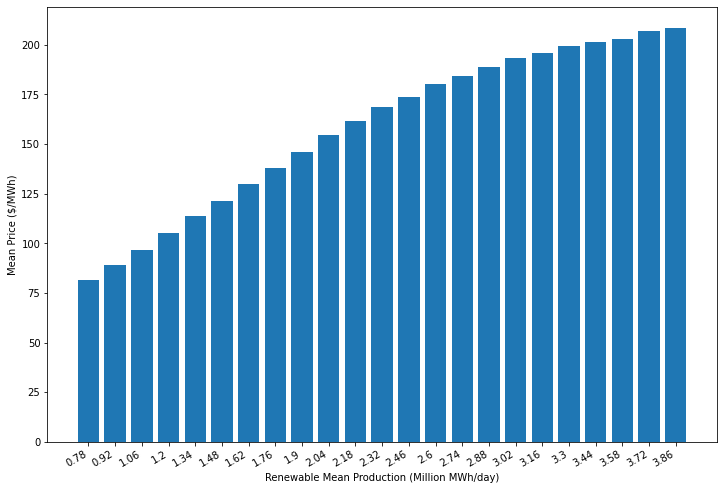

In [53]:
fig,ax = plt.subplots()
ax.bar(np.arange(23),means,tick_label=scale_factors)
ax.set_xticklabels(scale_factors, rotation=30, ha='right')
ax.set_xlabel("Renewable Mean Production (Million MWh/day)")
ax.set_ylabel("Mean Price ($/MWh)")
plt.savefig("ren_prod_vs_avg_price_sensitivity.png")

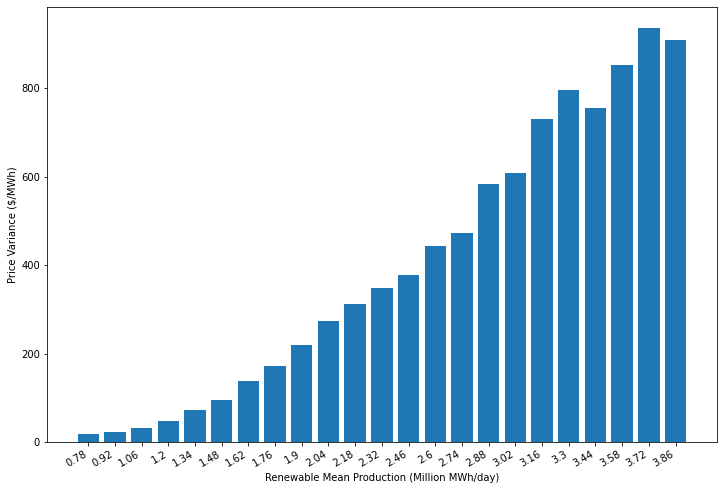

In [54]:
fig,ax = plt.subplots()
ax.bar(np.arange(23),var,tick_label=scale_factors)
ax.set_xticklabels(scale_factors, rotation=30, ha='right')
ax.set_xlabel("Renewable Mean Production (Million MWh/day)")
ax.set_ylabel("Price Variance ($/MWh)")
plt.savefig("ren_prod_vs_price_variance_sensitivity.png")

In [ ]:
dfs[0]